In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import *
import seaborn as sns
from janitor import *
from plotnine.data import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18


 ## First steps

In [3]:
mpg.shape

(234, 11)

In [4]:
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


 ### Exercise

<AxesSubplot:xlabel='displ', ylabel='hwy'>

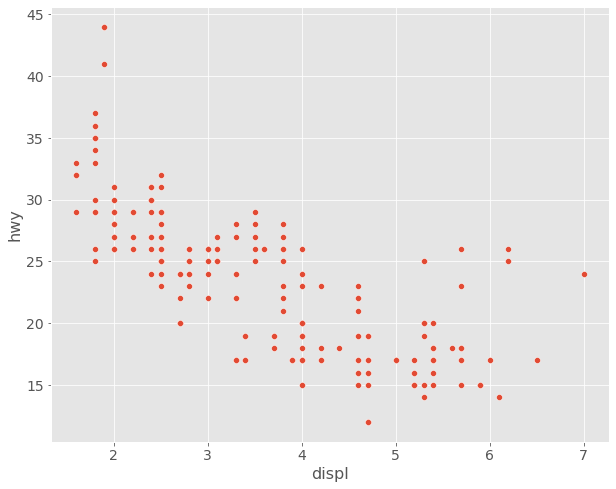

In [5]:
sns.scatterplot(data=mpg, x='displ', y='hwy')


<AxesSubplot:xlabel='cyl', ylabel='hwy'>

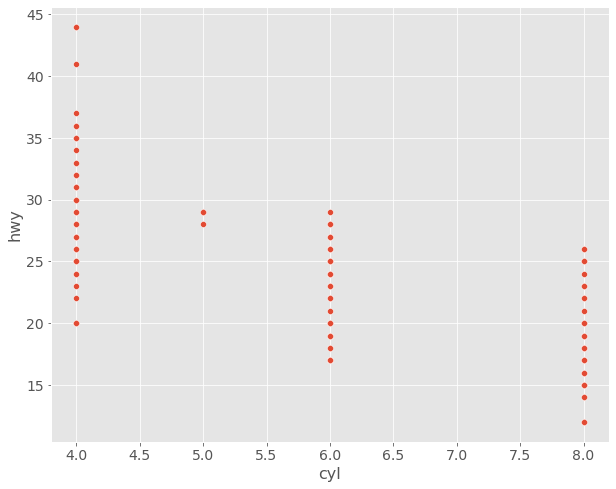

In [6]:
sns.scatterplot(data=mpg, x='cyl', y='hwy')


<AxesSubplot:xlabel='class', ylabel='drv'>

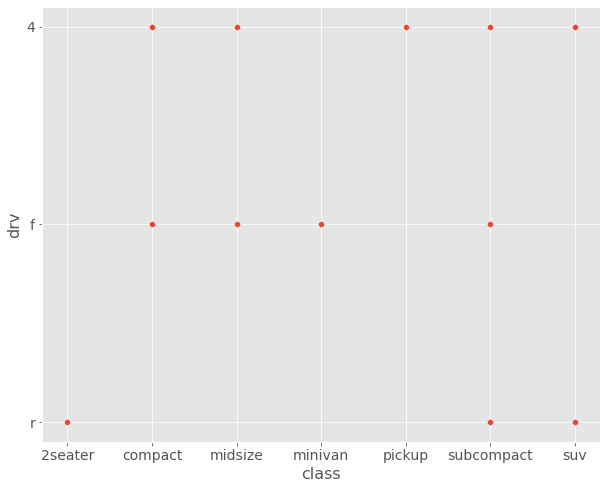

In [7]:
sns.scatterplot(data=mpg, x='class', y='drv')


In [8]:
mpg_count = (
    mpg.groupby(['class', 'drv'])
    .size()
    .reset_index(name='count')
    )
mpg_count


,class,drv,count
0,2seater,4,0
1,2seater,f,0
2,2seater,r,5
3,compact,4,12
4,compact,f,35
5,compact,r,0
6,midsize,4,3
7,midsize,f,38
8,midsize,r,0
9,minivan,4,0


<AxesSubplot:xlabel='class', ylabel='drv'>

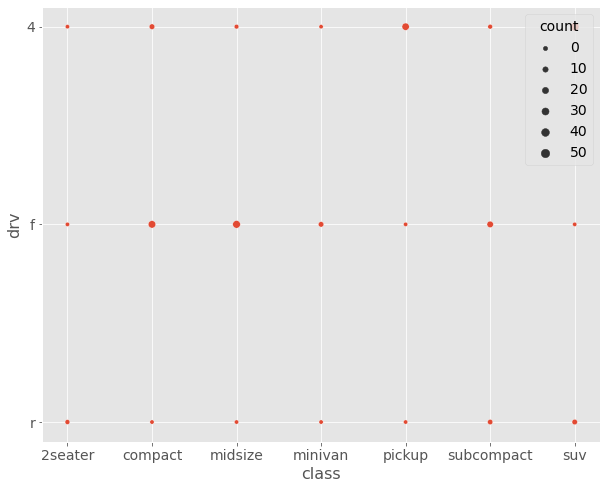

In [9]:
sns.scatterplot(
    data=mpg_count, x='class', y='drv', 
    size='count')

In [10]:
mpg_count_map = (
    mpg_count
    .pivot_table(
        index='class', 
        columns='drv', 
        values='count'))
mpg_count_map

drv,4,f,r
class,,,
2seater,0,0,5
compact,12,35,0
midsize,3,38,0
minivan,0,11,0
pickup,33,0,0
subcompact,4,22,9
suv,51,0,11


<AxesSubplot:xlabel='class', ylabel='drv'>

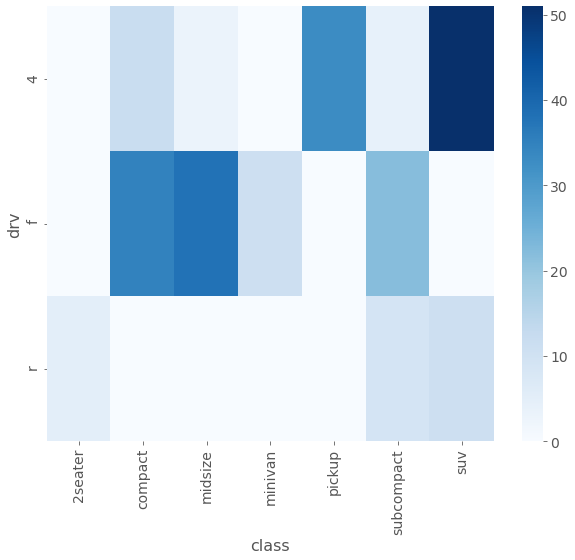

In [11]:
sns.heatmap(mpg_count_map.transpose(), cmap='Blues')

 ## Aesthetic mappings

In [12]:
mpg_1 = mpg.query('displ > 5 and hwy > 20')


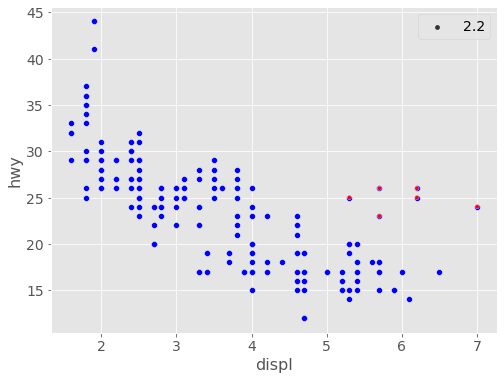

In [13]:
_, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    color='blue', 
    ax=ax)
sns.scatterplot(
    data=mpg_1, x='displ', y='hwy', 
    color='red', size=2.2, 
    ax=ax)
ax.legend()

<AxesSubplot:xlabel='displ', ylabel='hwy'>

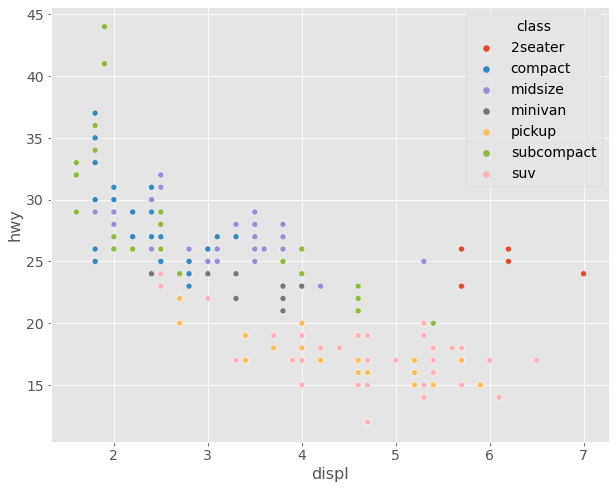

In [14]:
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    hue='class')


<AxesSubplot:xlabel='displ', ylabel='hwy'>

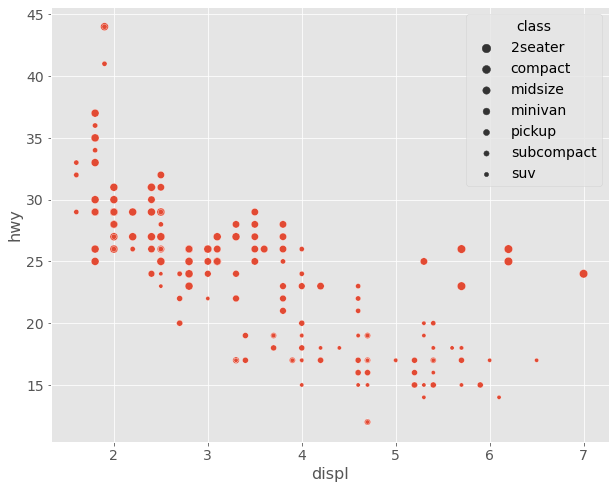

In [15]:
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    size='class')


 ### Seaborn can not accept categorical values in `alpha` of `scatterplot()`

<AxesSubplot:xlabel='displ', ylabel='hwy'>

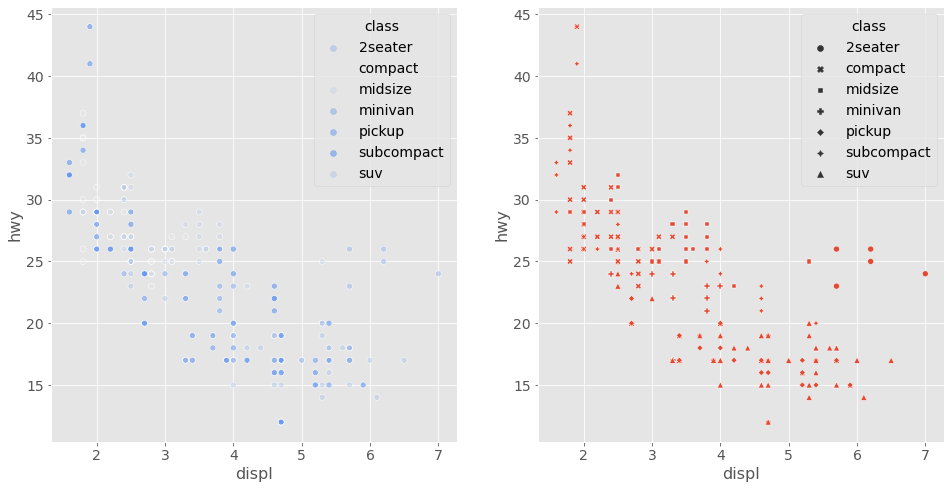

In [16]:
cat_list = mpg['class'].unique()
cat_num = len(cat_list)
color_dict = {}

for i in range(cat_num):
    color_dict[cat_list[i]] = to_rgba('cornflowerblue', i/10)

_, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    hue='class', palette=color_dict, 
    ax=axes[0])
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    style='class', 
    ax=axes[1])

 ### Exercise

<AxesSubplot:xlabel='displ', ylabel='hwy'>

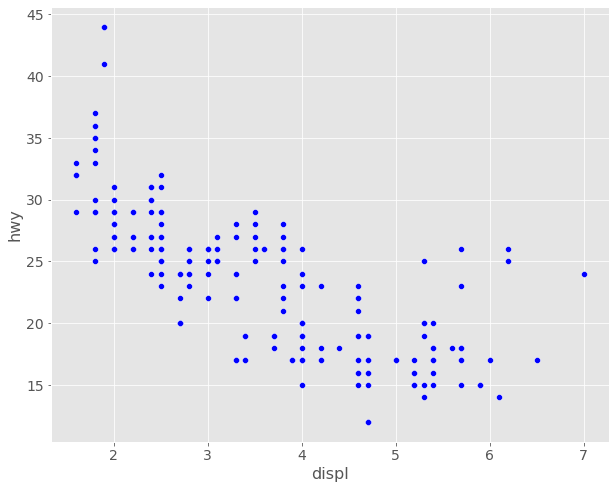

In [17]:
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    color='blue')


<AxesSubplot:xlabel='displ', ylabel='hwy'>

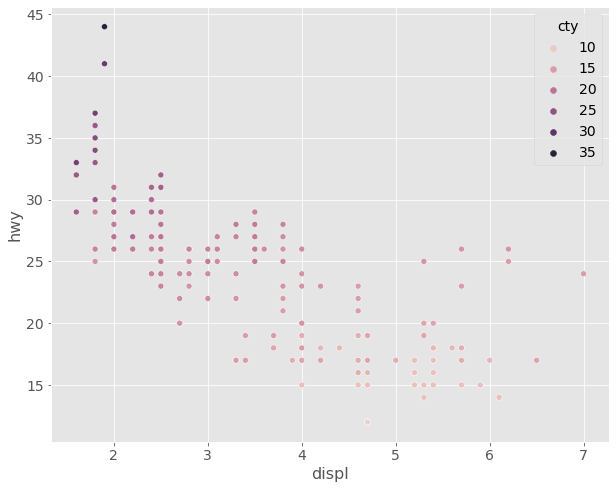

In [18]:
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    hue='cty', cmap='Blues')


<AxesSubplot:xlabel='displ', ylabel='hwy'>

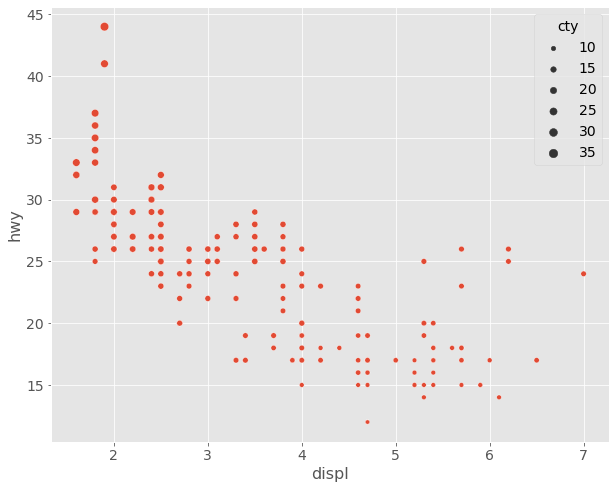

In [19]:
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    size='cty')


<AxesSubplot:xlabel='displ', ylabel='hwy'>

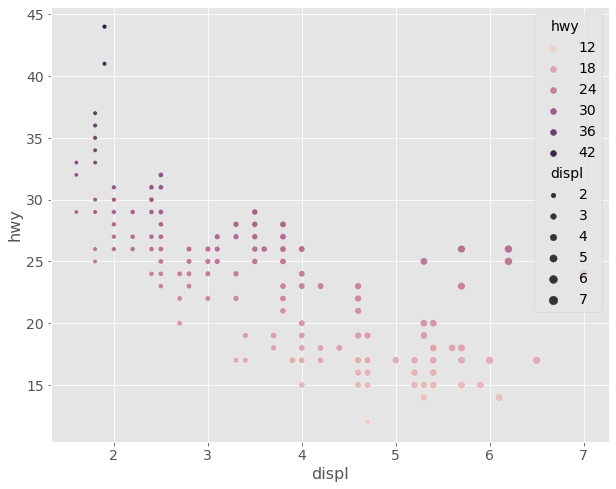

In [20]:
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    hue='hwy', size='displ', cmap='Blues') 


In [21]:
mtcars.shape


(32, 12)

Seaborn has no `stroke` property

<AxesSubplot:xlabel='displ', ylabel='hwy'>

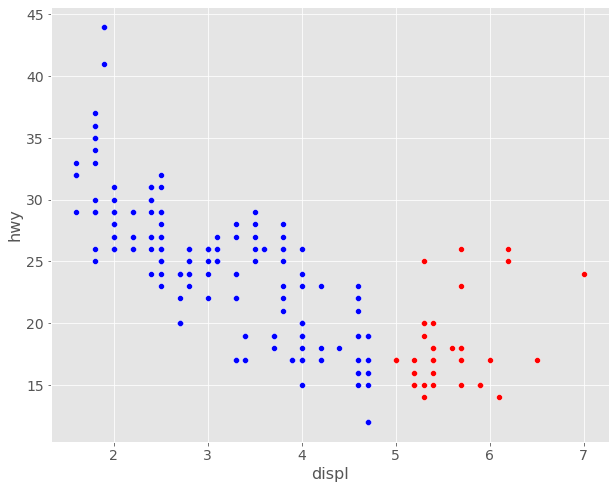

In [22]:
sns.scatterplot(
    data=mpg.query('displ < 5'), x='displ', y='hwy', 
    color='blue')
sns.scatterplot(
    data=mpg.query('displ >= 5'), x='displ', y='hwy', 
    color='red')


 ## Facets

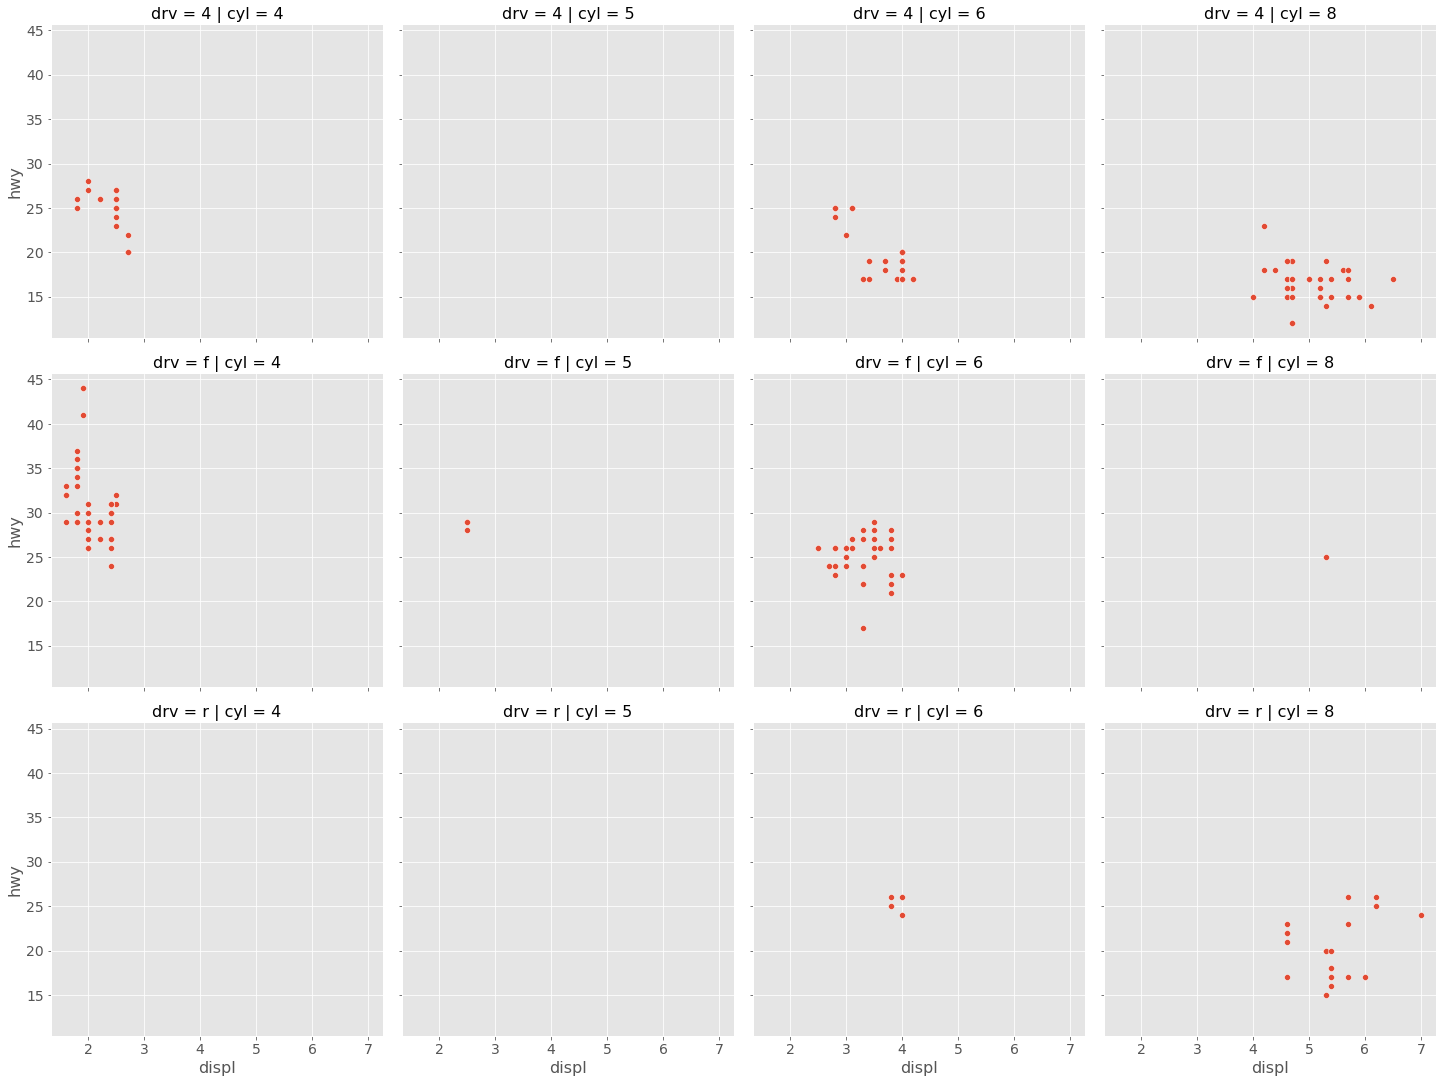

In [23]:
sns.relplot(
    data=mpg, x='displ', y='hwy', 
    col='cyl', row='drv')


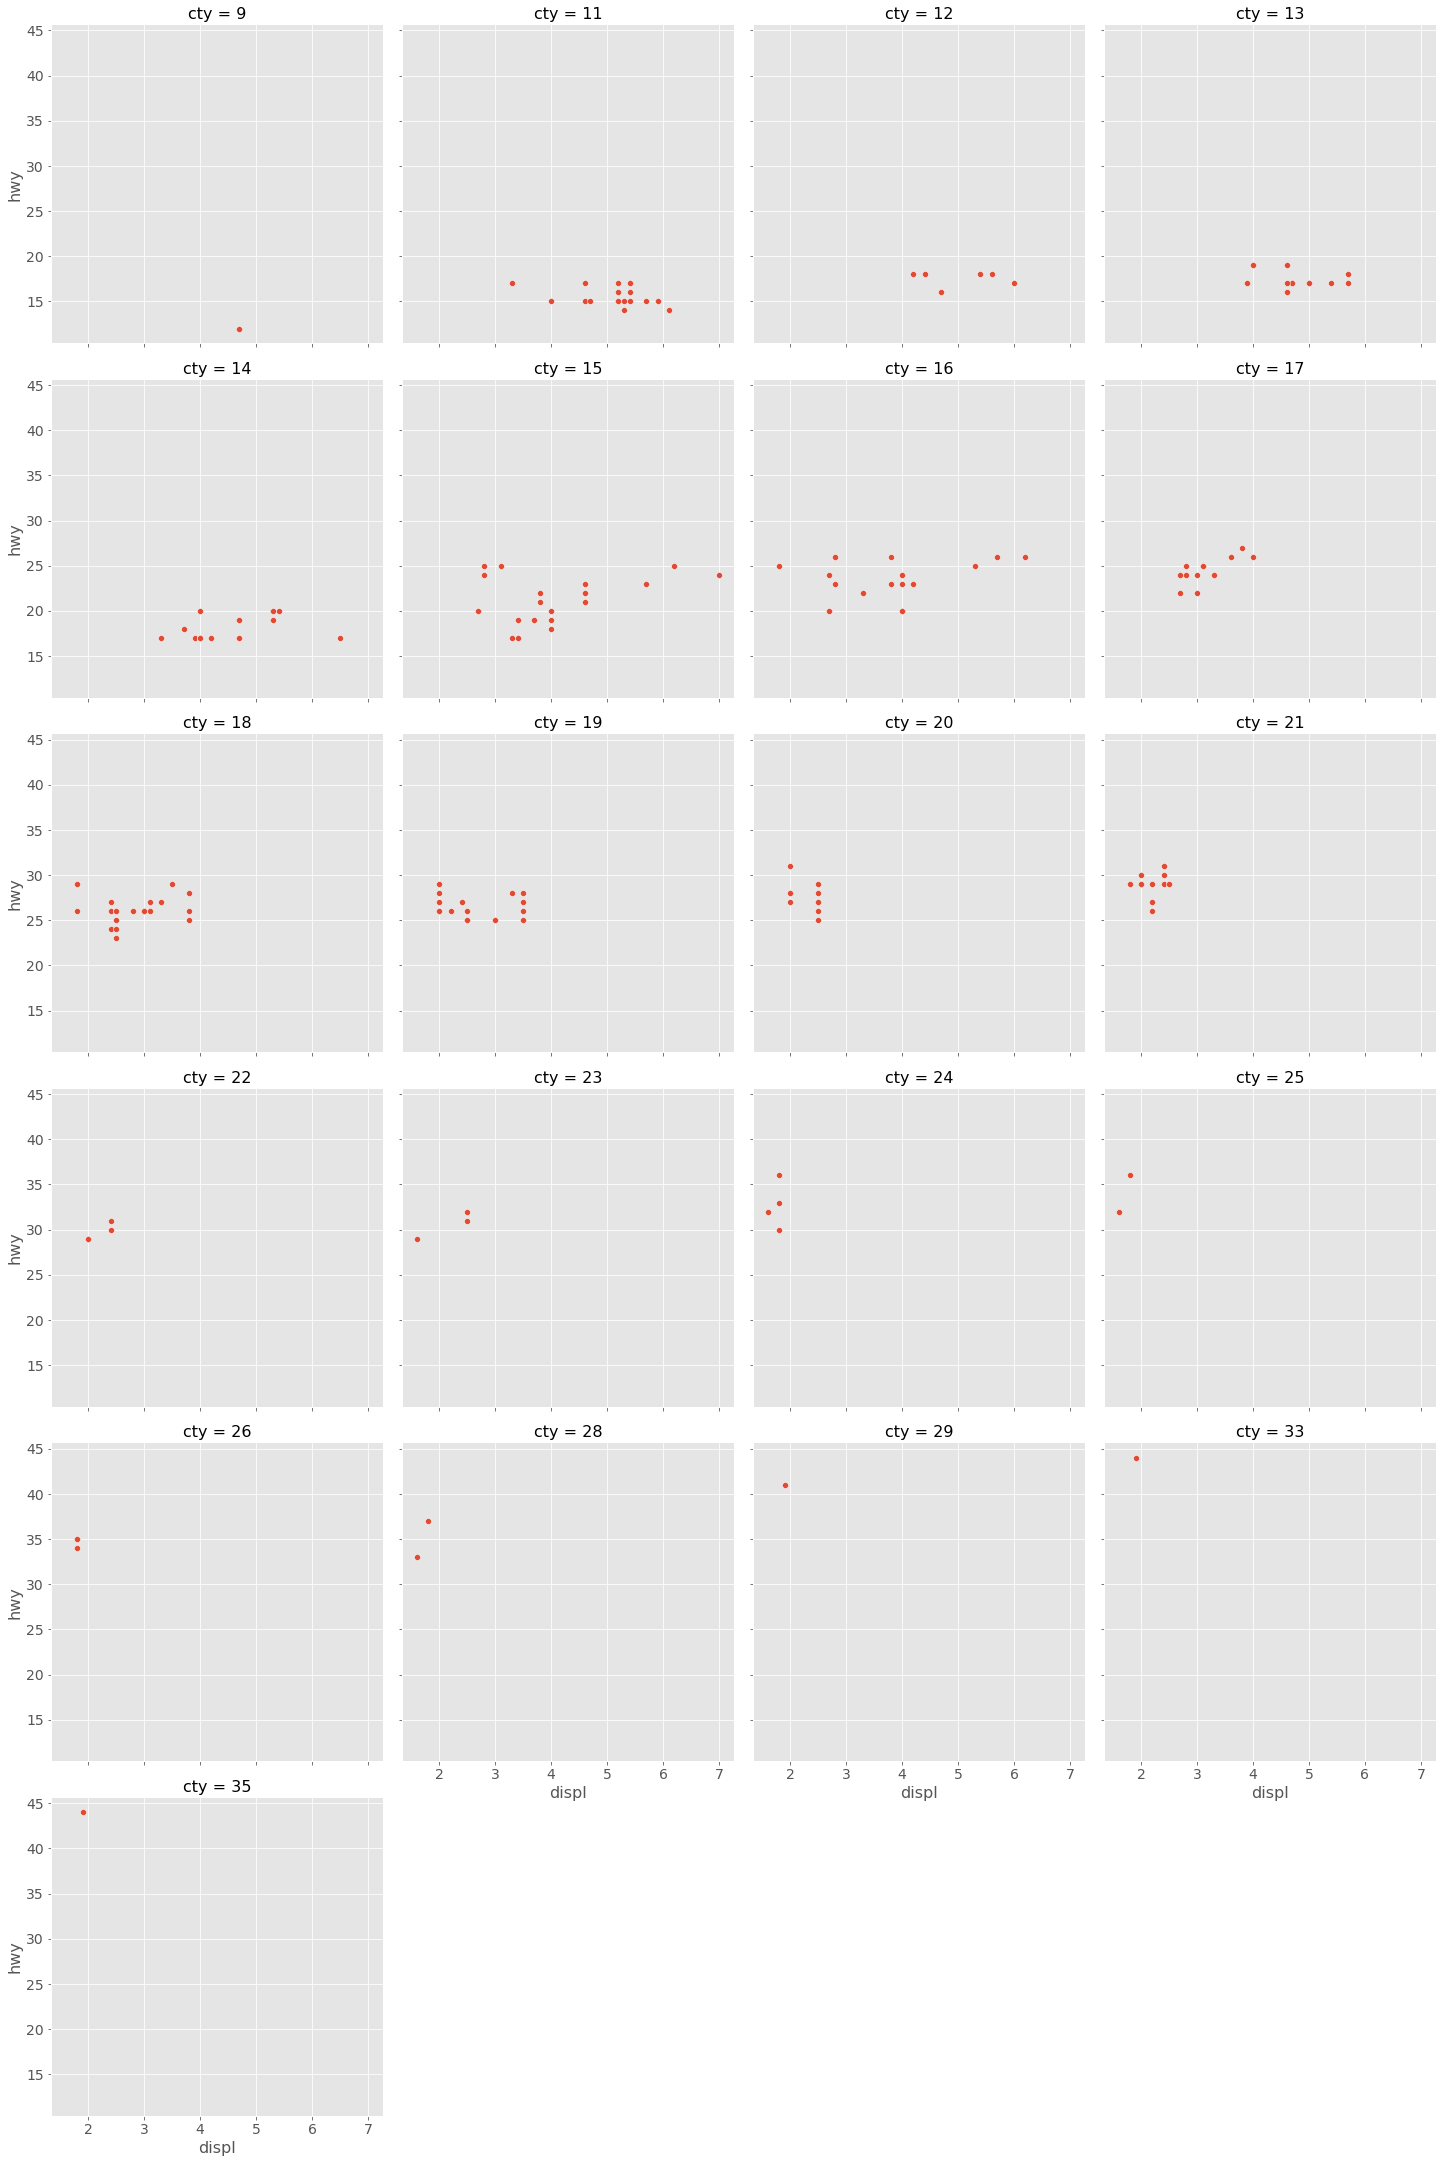

In [24]:
sns.relplot(
    data=mpg, x='displ', y='hwy', 
    col='cty', col_wrap=4)

<AxesSubplot:xlabel='drv', ylabel='cyl'>

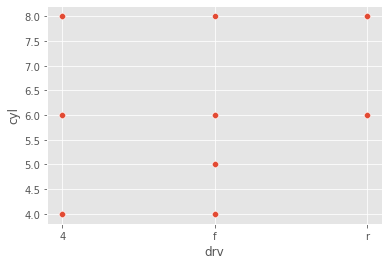

In [2]:
sns.scatterplot(
    data = mpg, x = 'drv', y = 'cyl')


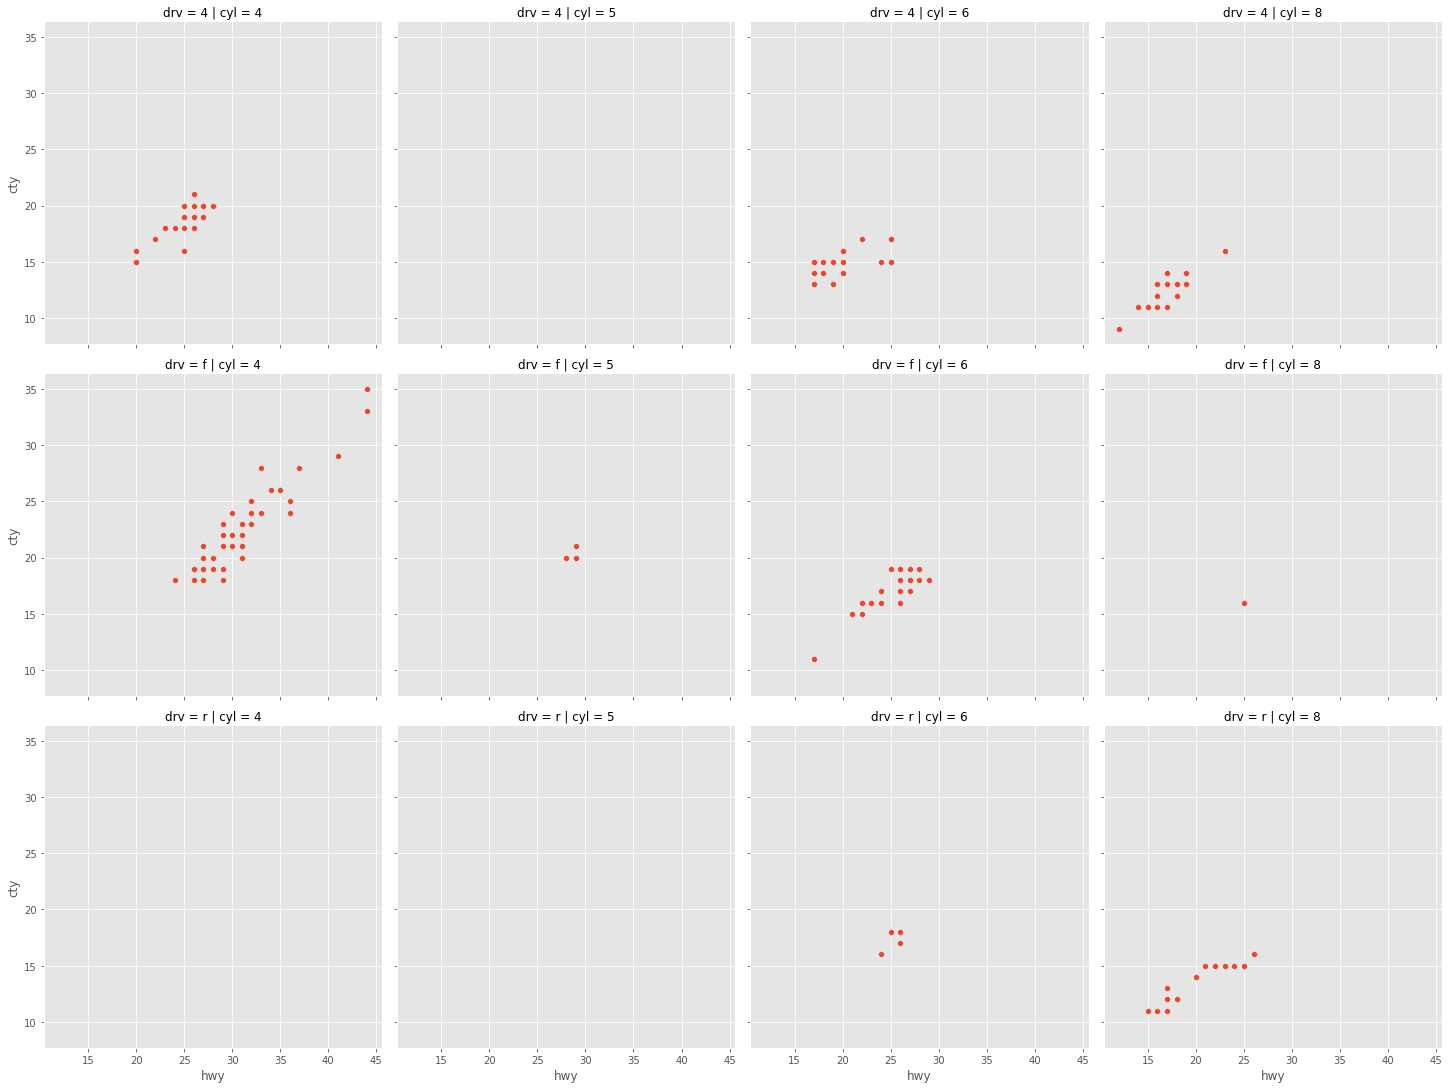

In [3]:
sns.relplot(
    data=mpg, x = 'hwy', y = 'cty', 
    col='cyl', row='drv')

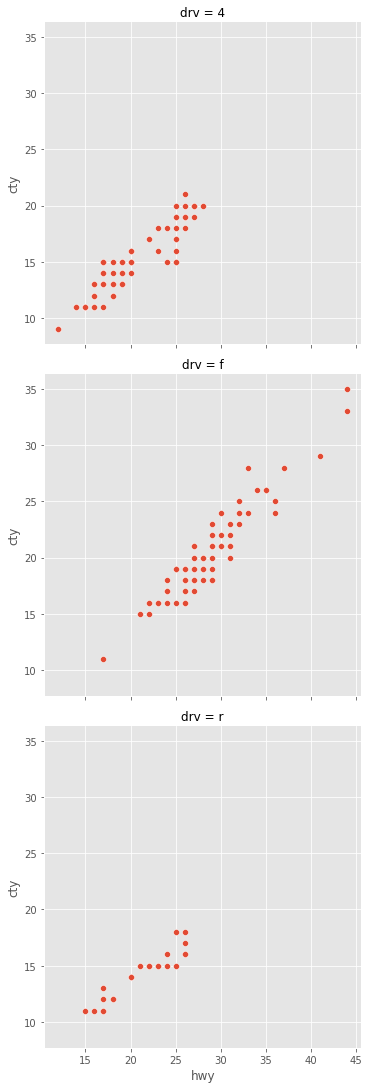

In [6]:
sns.relplot(
    data=mpg, x = 'hwy', y = 'cty', 
    row='drv')

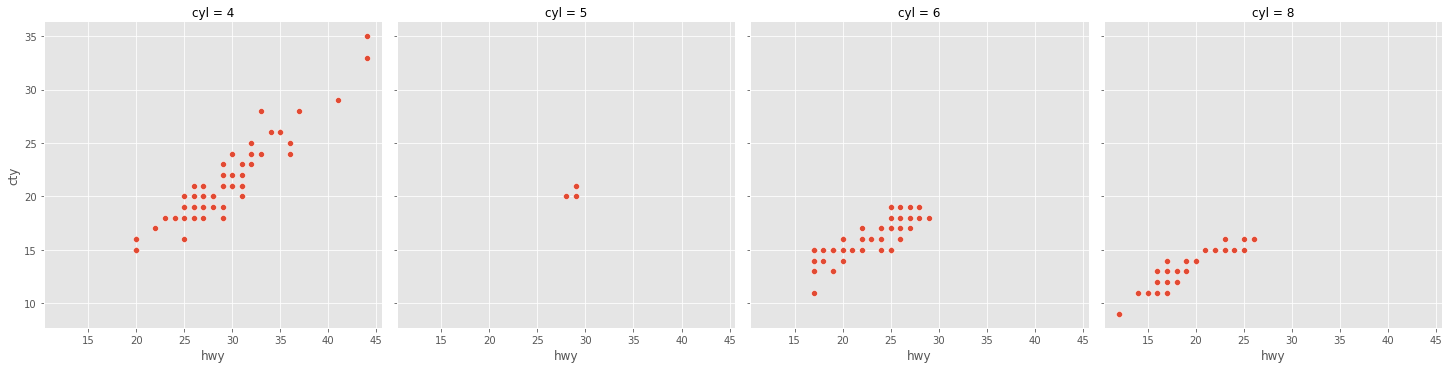

In [7]:
sns.relplot(
    data=mpg, x = 'hwy', y = 'cty', 
    col='cyl')

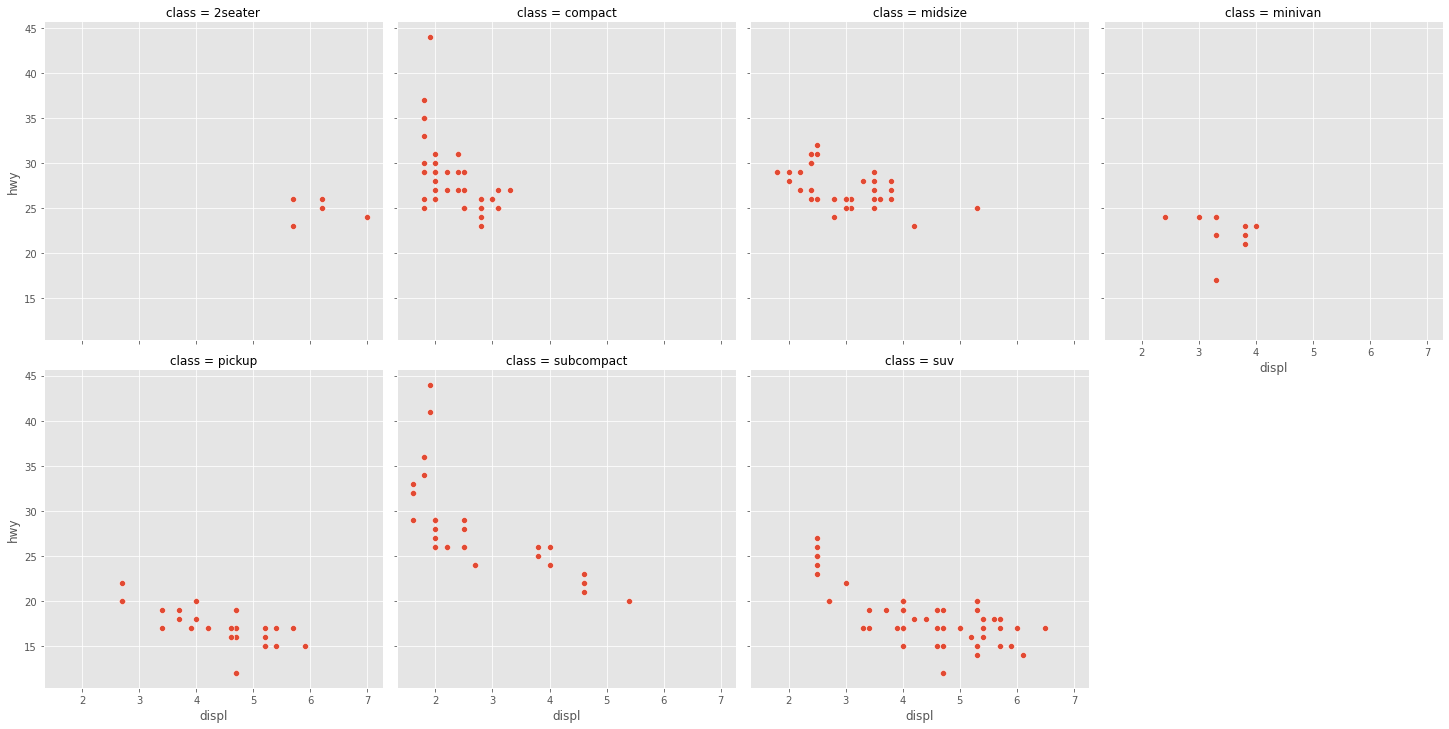

In [12]:
sns.relplot(
    data = mpg, x = 'displ', y = 'hwy', 
    col='class', col_wrap = 4)

## Geometric objects

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    hue='class', palette=color_dict, 
    ax=axes[0])
sns.scatterplot(
    data=mpg, x='displ', y='hwy', 
    style='class', 
    ax=axes[1])